# Persisting Data

In [1]:
from dask.distributed import Client
import dask.dataframe as df

client = Client(processes=False, threads_per_worker=2,
                n_workers=3, memory_limit='4GB')
client

Client Scheduler: inproc://192.168.0.105/7140/1 Dashboard: http://localhost:8787/status,Cluster Workers: 3 Cores: 6 Memory: 12.00 GB


In [2]:
dummy_df = df.read_csv('multiple_csvs/*.csv')

In [3]:
dummy_df

,Unnamed: 0,country,gdp,year
npartitions=10,,,,
,int64,object,float64,int64
,...,...,...,...
...,...,...,...,...
,...,...,...,...
,...,...,...,...


In [4]:
dummy_df.describe().visualize(filename='describe.png')

In [5]:
dummy_df.head()

,Unnamed: 0,country,gdp,year
0,0,India,2.650725e+12,2017
1,1,India,2.290432e+12,2016
2,2,India,2.103588e+12,2015
3,3,India,2.039127e+12,2014
4,4,India,1.856722e+12,2013


In [6]:
# Currently in 1.2.1 inplace arguement is not supported
dummy_df = dummy_df.drop('Unnamed: 0', axis=1)

In [7]:
dummy_df.head()

,country,gdp,year
0,India,2.650725e+12,2017
1,India,2.290432e+12,2016
2,India,2.103588e+12,2015
3,India,2.039127e+12,2014
4,India,1.856722e+12,2013


In [8]:
max_gdp_per_country = dummy_df.groupby('country')['gdp'].max()

### You will see that `drop_column` is getting evaluated again

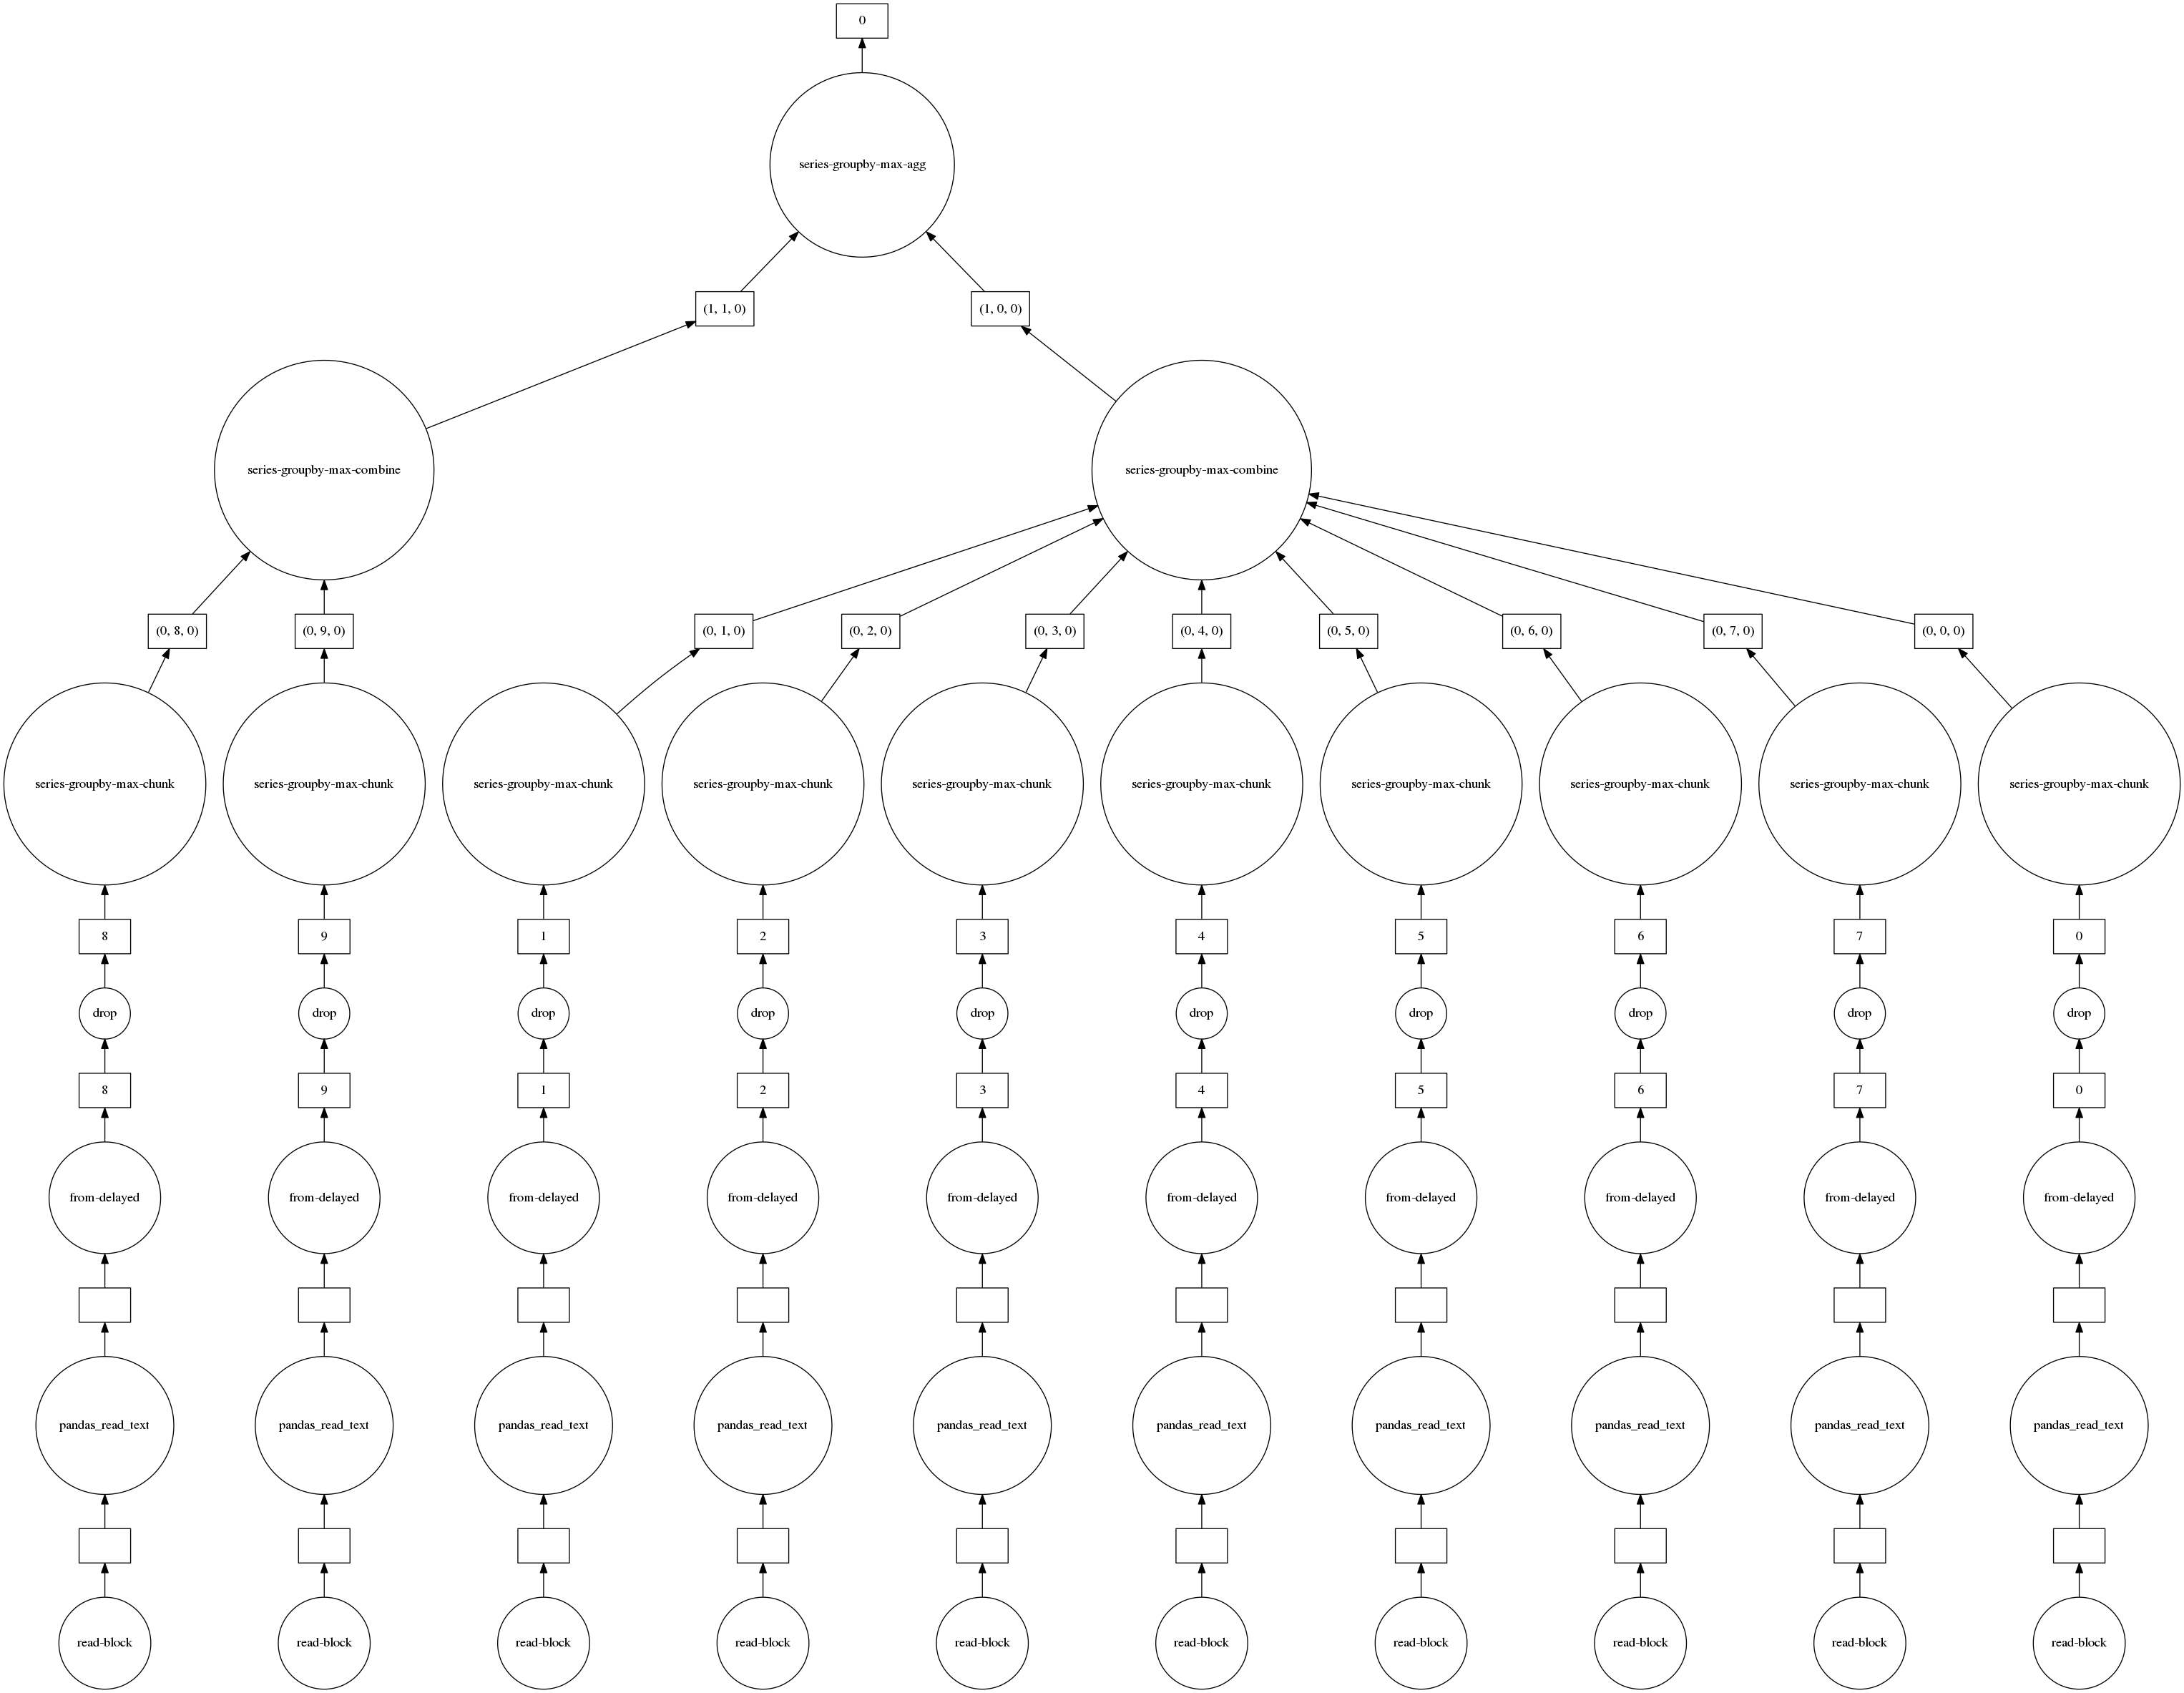

In [9]:
max_gdp_per_country.visualize()

In [ ]:
max_gdp_per_country.compute()

In [10]:
without_japan = dummy_df[dummy_df.country !='Japan']

## Even here, `drop_column` is getting evaluated again

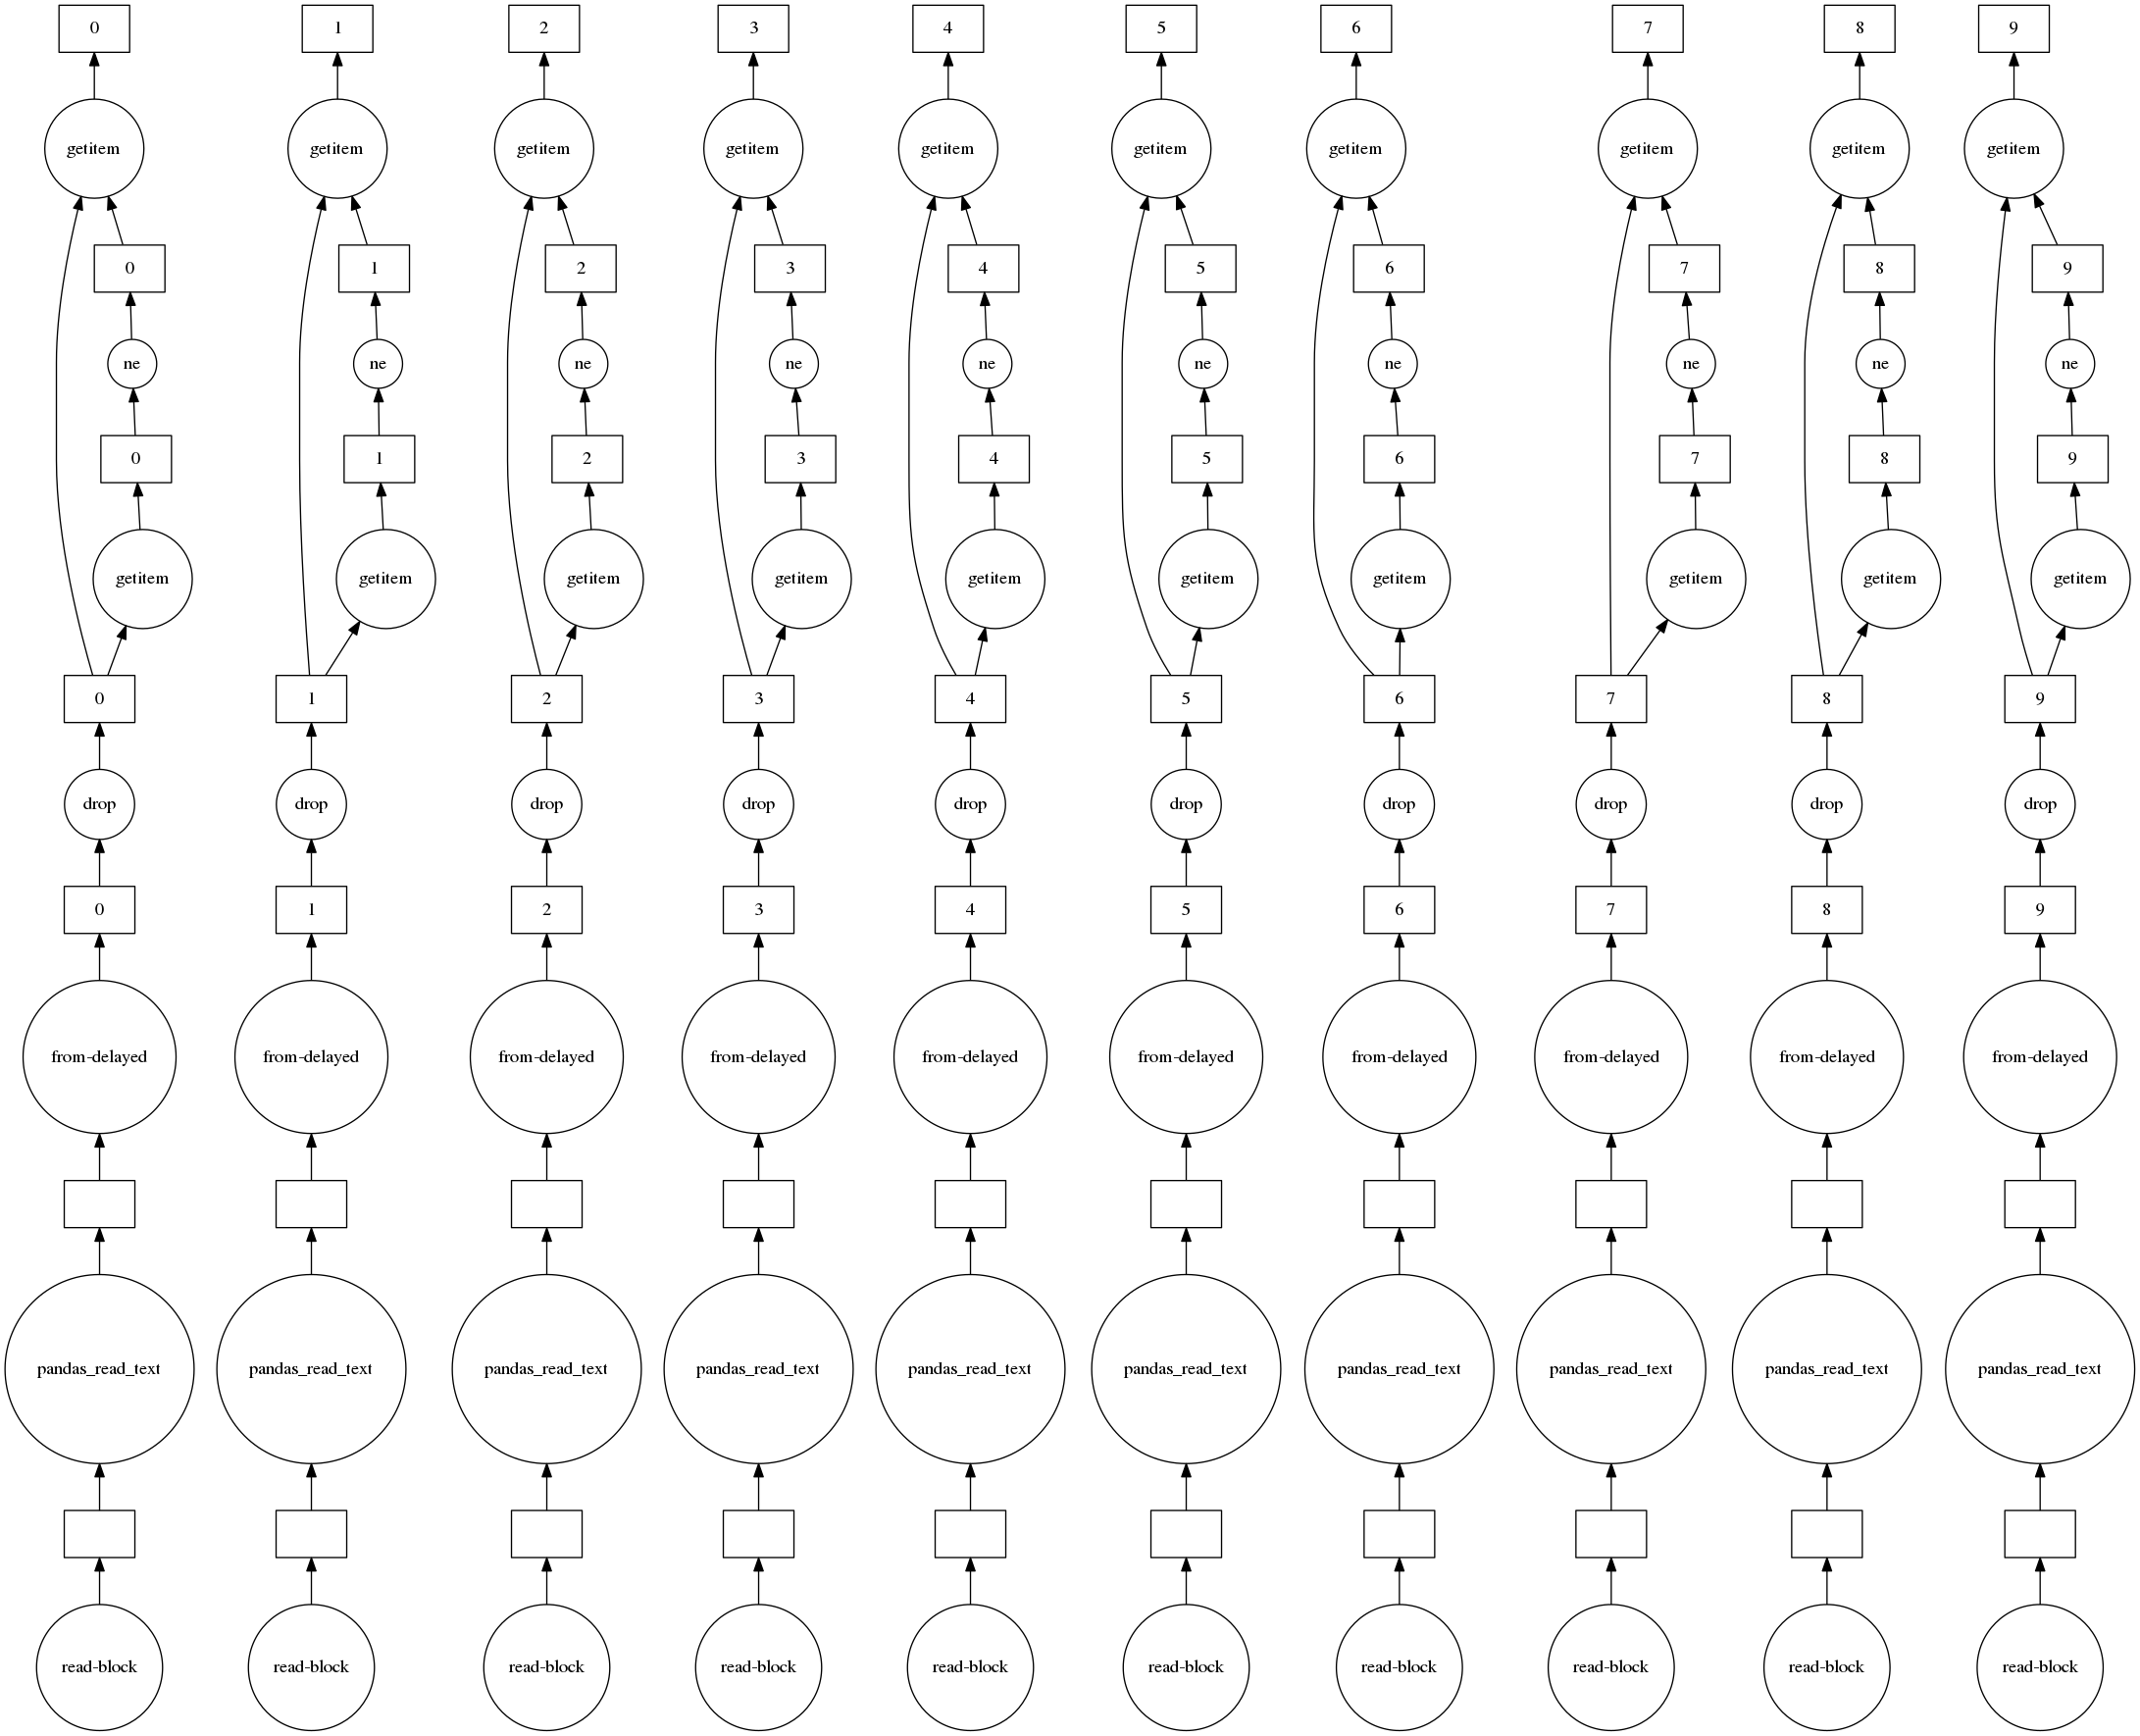

In [11]:
without_japan.visualize()

In [24]:
#persisted_df = without_japan.persist()

In [25]:
#persisted_gdp = persisted_df.groupby('country')['gdp'].max()

In [26]:
#persisted_df.visualize()

In [17]:
def add_some_text(cname, *args, **kwargs):
    return "Country name is " + cname

country_names = persisted_df['country'].apply(add_some_text,
                                              axis=1,
                                              meta=('country', 'object'))

In [18]:
country_names

Dask Series Structure:
npartitions=10
    object
       ...
     ...  
       ...
       ...
Name: country, dtype: object
Dask Name: apply, 30 tasks

## You will see that `drop` and `read` are not happening again

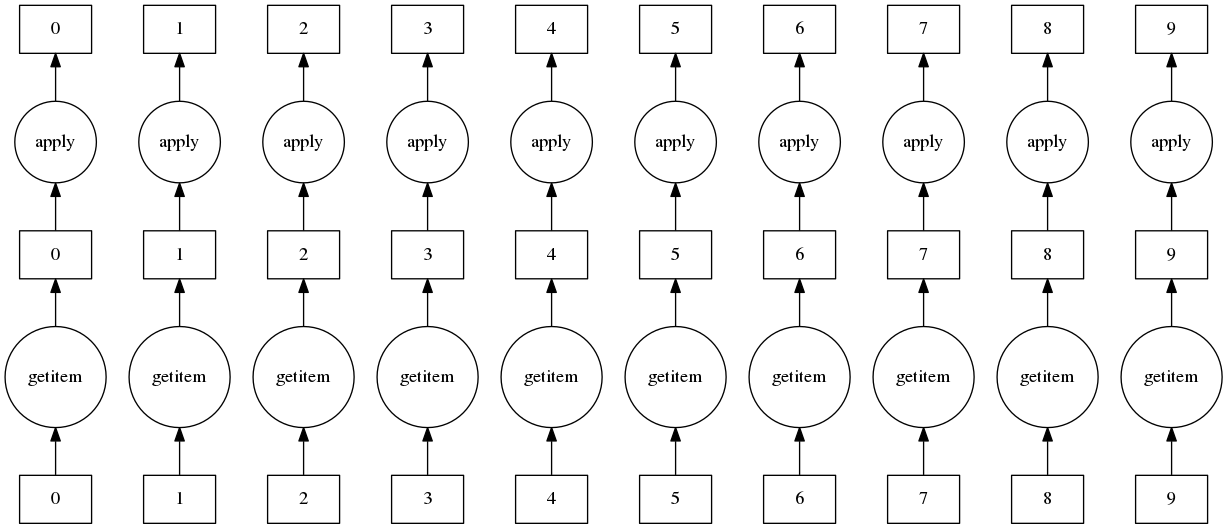

In [19]:
country_names.visualize()